In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("ds_challenge_v2_1_data.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54681 entries, 0 to 54680
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    54681 non-null  int64  
 1   city_name             54681 non-null  object 
 2   signup_os             47824 non-null  object 
 3   signup_channel        54681 non-null  object 
 4   signup_date           54681 non-null  object 
 5   bgc_date              32896 non-null  object 
 6   vehicle_added_date    13134 non-null  object 
 7   vehicle_make          13223 non-null  object 
 8   vehicle_model         13223 non-null  object 
 9   vehicle_year          13223 non-null  float64
 10  first_completed_date  6137 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.6+ MB
None


In [9]:
df

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
54676,54677,Strark,other,Paid,1/15/16,NaN,NaN,NaN,NaN,NaN,NaN
54677,54678,Strark,other,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
54678,54679,Strark,ios web,Organic,1/6/16,NaN,NaN,NaN,NaN,NaN,NaN
54679,54680,Berton,android web,Paid,1/18/16,NaN,NaN,NaN,NaN,NaN,NaN


> categorize the dataset

In [11]:
# Analyze the dataset and categorize it based on its structure and type of data present
# Based on the initial review of columns, this dataset involves user activities, possibly related to a signup or workflow process.

# Dataset Categories
categories = {
    'user_info': ['id', 'city_name', 'signup_os'],  # Information about the user, OS, and city
    'signup_info': ['signup_date', 'signup_channel'],  # Details about the sign-up process
    'verification_info': ['bgc_date'],  # Background verification process
    'vehicle_info': ['vehicle_added_date', 'vehicle_make', 'vehicle_model', 'vehicle_year'],  # Details on vehicles added
    'activity_info': ['first_completed_date']  # Activity performed by the user
}

categories

{'user_info': ['id', 'city_name', 'signup_os'],
 'signup_info': ['signup_date', 'signup_channel'],
 'verification_info': ['bgc_date'],
 'vehicle_info': ['vehicle_added_date',
  'vehicle_make',
  'vehicle_model',
  'vehicle_year'],
 'activity_info': ['first_completed_date']}

The dataset is categorized as follows:
- User information: `id`, `city_name`, `signup_os`
- Signup information: `signup_date`, `signup_channel`
- Verification information: `bgc_date`
- Vehicle information: `vehicle_added_date`, `vehicle_make`, `vehicle_model`, `vehicle_year`
- Activity information: `first_completed_date`

In [63]:
summary = df.describe(include='all')
summary

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
count,54681.000000,54681,47824,54681,54681,32896,13134,13223,13223,13223.000000,6137
unique,NaN,3,5,3,30,74,78,46,368,NaN,57
top,NaN,Strark,ios web,Paid,1/5/16,1/29/16,1/26/16,Toyota,Civic,NaN,1/23/16
freq,NaN,29557,16632,23938,2489,1125,377,3219,689,NaN,257
mean,27341.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.568025,NaN
std,15785.189372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.219184,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,13671.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN
50%,27341.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN
75%,41011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN


The data summary provides key information about characteristics like count, unique values, and common measures such as mean, std, min, and max for numeric columns. It highlights missing values in columns, uneven distributions, and specific details like an unusually broad vehicle year range (min = 0).

> how many distinct cities and what are they

In [29]:
distinct_cities = df['city_name'].unique()
distinct_city_count = len(distinct_cities)

(distinct_city_count, distinct_cities)

(3, array(['Strark', 'Wrouver', 'Berton'], dtype=object))

There are 3 distinct cities: Strark, Wrouver, and Berton.

> summarize signup info

In [27]:
# Analyze signup information related columns
signup_summary = df[['signup_date', 'signup_channel']].describe(include='all')
signup_summary

,signup_date,signup_channel
count,54681,54681
unique,30,3
top,1/5/16,Paid
freq,2489,23938


The signup information summary reveals:

- 54,681 entries exist for both `signup_date` and `signup_channel`.
- The most common signup channel is "Paid", accounting for 23,938 entries.
- Signups occur over the date range of January 1, 2016, to January 30, 2016

In [31]:
distinct_signup_os = df['signup_os'].unique()
distinct_signup_os_count = len(distinct_signup_os)

(distinct_signup_os_count, distinct_signup_os)

(6,
 array(['ios web', 'windows', 'android web', nan, 'mac', 'other'],
       dtype=object))

In [33]:
distinct_signup_channel = df['signup_channel'].unique()
distinct_signup_channel_count = len(distinct_signup_channel)

(distinct_signup_channel_count, distinct_signup_channel)

(3, array(['Paid', 'Organic', 'Referral'], dtype=object))

city_name       Berton  Strark  Wrouver
signup_channel                         
Organic           4841    7283     1303
Paid              8741   12407     2790
Referral          6535    9867      914


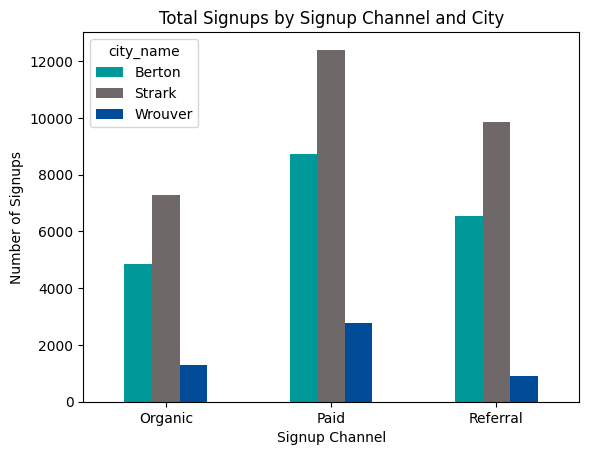

In [17]:
signup_channel_city_counts = df.groupby(['signup_channel', 'city_name']).size()
#'#009999', '#443B3B', '#004C99'
colors = ['#009999', '#6E6868', '#004C99', '#009999', '#6E6868', '#004C99', '#009999', '#6E6868', '#004C99']
signup_channel = signup_channel_city_counts.unstack()
print(signup_channel.head())
signup_channel.plot(kind='bar', title='Total Signups by Signup Channel and City', ylabel='Number of Signups', xlabel ='Signup Channel', color = colors)
plt.xticks(rotation = 0)
plt.show()

In [70]:
vehicle_info_summary = df[['vehicle_added_date', 'vehicle_make', 'vehicle_model', 'vehicle_year']].describe(include='all')
vehicle_info_summary

,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year
count,13134,13223,13223,13223.000000
unique,78,46,368,NaN
top,1/26/16,Toyota,Civic,NaN
freq,377,3219,689,NaN
mean,NaN,NaN,NaN,2010.568025
std,NaN,NaN,NaN,35.219184
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,2008.000000
50%,NaN,NaN,NaN,2013.000000
75%,NaN,NaN,NaN,2015.000000


In [65]:
num_vehicle = df['vehicle_make'].count()
num_vehicle

13223

In [33]:
data_1 = df
data_clean = data_1.dropna(subset=['first_completed_date'])
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6137 entries, 3 to 54665
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6137 non-null   int64  
 1   city_name             6137 non-null   object 
 2   signup_os             5989 non-null   object 
 3   signup_channel        6137 non-null   object 
 4   signup_date           6137 non-null   object 
 5   bgc_date              6137 non-null   object 
 6   vehicle_added_date    5872 non-null   object 
 7   vehicle_make          5873 non-null   object 
 8   vehicle_model         5873 non-null   object 
 9   vehicle_year          5873 non-null   float64
 10  first_completed_date  6137 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 575.3+ KB
None


In [36]:
df["vehicle_make"].value_counts()

vehicle_make
Toyota           3219
Honda            1845
Nissan           1311
Ford              778
Hyundai           677
Chevrolet         665
Kia               584
Volkswagen        503
Dodge             393
Mercedes-Benz     348
Lexus             335
BMW               330
Mazda             292
Subaru            221
Jeep              203
Chrysler          202
Acura             190
Scion             164
Infiniti          147
Audi              144
Mitsubishi        113
GMC                89
Cadillac           86
Lincoln            70
Volvo              57
Buick              46
Pontiac            30
Saturn             30
Mini               20
Land Rover         20
Jaguar             15
Tesla              13
Suzuki             12
Fiat               11
Porsche            10
Mercury             9
Autobot             8
Saab                7
Hummer              7
Bike                6
Bicycle             5
Isuzu               2
Maserati            2
Bentley             2
Walker             

In [38]:
data_clean["vehicle_make"].value_counts()

vehicle_make
Toyota           1535
Honda             860
Nissan            562
Ford              351
Hyundai           288
Chevrolet         258
Kia               254
Volkswagen        220
Lexus             161
Dodge             160
Mercedes-Benz     152
BMW               138
Mazda             129
Subaru             93
Acura              89
Jeep               89
Scion              79
Chrysler           78
Audi               61
Infiniti           57
GMC                42
Mitsubishi         37
Cadillac           36
Lincoln            33
Buick              22
Volvo              15
Saturn             14
Mini                9
Pontiac             8
Jaguar              7
Suzuki              6
Mercury             5
Tesla               4
Fiat                4
Land Rover          4
Saab                3
Porsche             2
Hummer              2
Isuzu               1
Maserati            1
Autobot             1
Oldsmobile          1
Bike                1
Bicycle             1
Name: count, dtype:

In [7]:
df_bike = df[df['vehicle_make'] == 'Bike']
df_bike

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
7164,7165,Berton,windows,Paid,1/10/16,NaN,NaN,Bike,Bicycle,2016.0,NaN
20017,20018,Berton,other,Organic,1/13/16,NaN,2/29/16,Bike,Bicycle,0.0,NaN
39889,39890,Berton,windows,Organic,1/12/16,NaN,NaN,Bike,Bicycle,2016.0,NaN
45124,45125,Berton,ios web,Organic,1/11/16,NaN,2/18/16,Bike,Bicycle,2016.0,NaN
45989,45990,Berton,ios web,Organic,1/11/16,NaN,1/24/16,Bike,Bicycle,2016.0,NaN
48890,48891,Berton,ios web,Organic,1/25/16,1/28/16,1/28/16,Bike,Bicycle,2016.0,2/1/16


In [21]:
df_walker = df[df['vehicle_make'] == 'Walker']
df_walker

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
39252,39253,Berton,windows,Organic,1/26/16,2/9/16,2/13/16,Walker,Delivery,2014.0,NaN


In [23]:
df_bicycle = df[df['vehicle_make'] == 'Bicycle']
df_bicycle

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
6747,6748,Berton,mac,Organic,1/6/16,1/15/16,1/31/16,Bicycle,Delivery,2016.0,NaN
24110,24111,Berton,windows,Organic,1/30/16,2/15/16,3/16/16,Bicycle,Delivery,2016.0,NaN
44775,44776,Berton,other,Referral,1/9/16,NaN,2/11/16,Bicycle,Delivery,2016.0,NaN
52359,52360,Berton,android web,Organic,1/6/16,1/6/16,1/9/16,Bicycle,Delivery,2016.0,1/8/16
53336,53337,Berton,ios web,Referral,1/20/16,NaN,2/14/16,Bicycle,Delivery,2016.0,NaN


In [37]:
data_clean

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
6,7,Strark,ios web,Paid,1/14/16,1/16/16,1/21/16,Toyota,Prius V,2014.0,1/23/16
12,13,Strark,android web,Referral,1/12/16,1/12/16,1/12/16,Kia,Optima,2015.0,1/28/16
15,16,Strark,windows,Referral,1/15/16,1/17/16,1/17/16,Toyota,Prius V,2015.0,1/16/16
43,44,Berton,android web,Referral,1/29/16,1/30/16,2/1/16,Toyota,Corolla,2015.0,2/4/16
...,...,...,...,...,...,...,...,...,...,...,...
54289,54290,Strark,ios web,Referral,1/18/16,1/18/16,1/20/16,Honda,Civic,2016.0,1/20/16
54290,54291,Berton,android web,Referral,1/13/16,1/15/16,1/18/16,Honda,Civic,2013.0,1/18/16
54303,54304,Strark,ios web,Referral,1/2/16,1/2/16,1/9/16,Audi,A6,2011.0,1/16/16
54384,54385,Strark,windows,Referral,1/30/16,1/30/16,NaN,NaN,NaN,NaN,2/9/16


In [7]:
# changing categorical data to numerical for training
df_new = df.copy()
signup_mapping = {"Paid": 0, "Referral": 1, "Organic": 2}
city_mapping = {"Strark": 0, "Wrouver": 1, "Berton": 2}
df_new["city_name"] = df_new["city_name"].map(city_mapping)
df_new["signup_channel"] = df_new["signup_channel"].map(signup_mapping)
df_new["first_completed_date"] = df_new["first_completed_date"].notna().astype(int)
df_new


,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,0,ios web,0,1/2/16,NaN,NaN,NaN,NaN,NaN,0
1,2,0,windows,0,1/21/16,NaN,NaN,NaN,NaN,NaN,0
2,3,1,windows,2,1/11/16,1/11/16,NaN,NaN,NaN,NaN,0
3,4,2,android web,1,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,1
4,5,0,android web,1,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,0
...,...,...,...,...,...,...,...,...,...,...,...
54676,54677,0,other,0,1/15/16,NaN,NaN,NaN,NaN,NaN,0
54677,54678,0,other,0,1/21/16,NaN,NaN,NaN,NaN,NaN,0
54678,54679,0,ios web,2,1/6/16,NaN,NaN,NaN,NaN,NaN,0
54679,54680,2,android web,0,1/18/16,NaN,NaN,NaN,NaN,NaN,0


In [23]:
df

,id,city_name,signup_os,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,vehicle_model,vehicle_year,first_completed_date
0,1,Strark,ios web,Paid,1/2/16,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Strark,windows,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Wrouver,windows,Organic,1/11/16,1/11/16,NaN,NaN,NaN,NaN,NaN
3,4,Berton,android web,Referral,1/29/16,2/3/16,2/3/16,Toyota,Corolla,2016.0,2/3/16
4,5,Strark,android web,Referral,1/10/16,1/25/16,1/26/16,Hyundai,Sonata,2016.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
54676,54677,Strark,other,Paid,1/15/16,NaN,NaN,NaN,NaN,NaN,NaN
54677,54678,Strark,other,Paid,1/21/16,NaN,NaN,NaN,NaN,NaN,NaN
54678,54679,Strark,ios web,Organic,1/6/16,NaN,NaN,NaN,NaN,NaN,NaN
54679,54680,Berton,android web,Paid,1/18/16,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
from sklearn.model_selection import train_test_split

X = df_new[['city_name', 'signup_channel']]
y = df_new['first_completed_date']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.09977105073567519

In [17]:
df_bike1 = df_bike.copy()
df_bike1 = df_bike1.drop(['signup_os', 'vehicle_model', 'vehicle_year', 'id'], axis = "columns")
df_bike1

,city_name,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,first_completed_date
7164,Berton,Paid,1/10/16,NaN,NaN,Bike,NaN
20017,Berton,Organic,1/13/16,NaN,2/29/16,Bike,NaN
39889,Berton,Organic,1/12/16,NaN,NaN,Bike,NaN
45124,Berton,Organic,1/11/16,NaN,2/18/16,Bike,NaN
45989,Berton,Organic,1/11/16,NaN,1/24/16,Bike,NaN
48890,Berton,Organic,1/25/16,1/28/16,1/28/16,Bike,2/1/16


In [25]:
df_bicycle1 = df_bicycle.copy()
df_bicycle1 = df_bicycle1.drop(['signup_os', 'vehicle_model', 'vehicle_year', 'id'], axis = "columns")
df_bicycle1

,city_name,signup_channel,signup_date,bgc_date,vehicle_added_date,vehicle_make,first_completed_date
6747,Berton,Organic,1/6/16,1/15/16,1/31/16,Bicycle,NaN
24110,Berton,Organic,1/30/16,2/15/16,3/16/16,Bicycle,NaN
44775,Berton,Referral,1/9/16,NaN,2/11/16,Bicycle,NaN
52359,Berton,Organic,1/6/16,1/6/16,1/9/16,Bicycle,1/8/16
53336,Berton,Referral,1/20/16,NaN,2/14/16,Bicycle,NaN
